## Basics of optimization

Using a linear function

$  y = w * x + b   $  

In [1]:
import torch
import numpy as np

import matplotlib.pyplot as plt


In [2]:

## inputs
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]

## outputs
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]


In [3]:

t_c = torch.tensor(   t_c   )
t_u = torch.tensor(   t_u   )

print(t_u)

print(t_c)


tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])
tensor([ 0.5000, 14.0000, 15.0000, 28.0000, 11.0000,  8.0000,  3.0000, -4.0000,
         6.0000, 13.0000, 21.0000])


In [4]:
## t_u = 0.1 * t_u
## print(t_u)

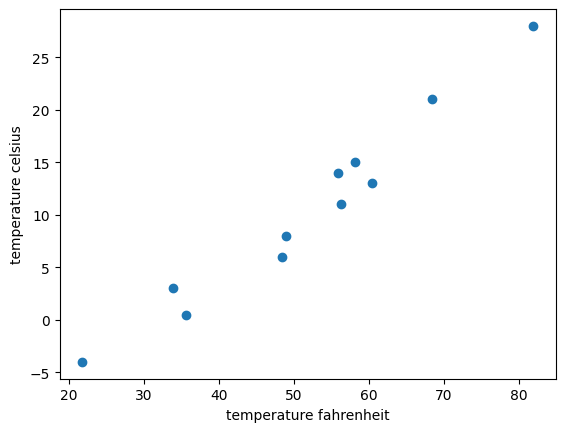

In [5]:


plt.xlabel("temperature fahrenheit")

plt.ylabel("temperature celsius")

plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.show()


## Inference Function (model)

t_c = w * t_u + b


In [6]:


def model(t_u, w, b):
    
    return w * t_u + b
    

## Loss function

In [7]:

def loss_fn(y_real, y_pred):
    
    squared_diffs = (y_real - y_pred) ** 2
    return squared_diffs.mean()


## Training Function

In [8]:


def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    
    for epoch in range(0, n_epochs):
        
        if params.grad is not None:
            params.grad.zero_()
        
        y_pred = model(t_u, *params)
        loss = loss_fn(  t_c  , y_pred)
        
        loss.backward()
        
        with torch.no_grad():
            params -= learning_rate * params.grad
            
        if epoch % 500 == 0:
            print(loss)
        
    
    return params


## Call Training Loop

In [19]:


result = training_loop(
            n_epochs = 100000,
            learning_rate = 0.0001,
            params = torch.tensor(  [1.0, 0.0], requires_grad=True    ),
            t_u = t_u,
            t_c = t_c
)




tensor(1763.8848, grad_fn=<MeanBackward0>)
tensor(28.6588, grad_fn=<MeanBackward0>)
tensor(28.2121, grad_fn=<MeanBackward0>)
tensor(27.7732, grad_fn=<MeanBackward0>)
tensor(27.3419, grad_fn=<MeanBackward0>)
tensor(26.9181, grad_fn=<MeanBackward0>)
tensor(26.5017, grad_fn=<MeanBackward0>)
tensor(26.0925, grad_fn=<MeanBackward0>)
tensor(25.6904, grad_fn=<MeanBackward0>)
tensor(25.2952, grad_fn=<MeanBackward0>)
tensor(24.9070, grad_fn=<MeanBackward0>)
tensor(24.5254, grad_fn=<MeanBackward0>)
tensor(24.1505, grad_fn=<MeanBackward0>)
tensor(23.7821, grad_fn=<MeanBackward0>)
tensor(23.4201, grad_fn=<MeanBackward0>)
tensor(23.0644, grad_fn=<MeanBackward0>)
tensor(22.7149, grad_fn=<MeanBackward0>)
tensor(22.3714, grad_fn=<MeanBackward0>)
tensor(22.0339, grad_fn=<MeanBackward0>)
tensor(21.7022, grad_fn=<MeanBackward0>)
tensor(21.3763, grad_fn=<MeanBackward0>)
tensor(21.0561, grad_fn=<MeanBackward0>)
tensor(20.7414, grad_fn=<MeanBackward0>)
tensor(20.4322, grad_fn=<MeanBackward0>)
tensor(20.1283

In [20]:

print(result)


tensor([  0.4839, -14.3032], requires_grad=True)


In [25]:

## celsius from fehrenheit
## 100 c = 212 f 


my_temp = model(99.5,*result)

In [26]:
my_temp

tensor(33.8448, grad_fn=<AddBackward0>)